# **Naïve Bayes**

## Inspecting the dataset

In [51]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = "final_cleaned_oscars.csv"
df = pd.read_csv(file_path)

df.head()

,Year,Category,Film,Film_ID,Nominee,Winner,TMDb_ID,Popularity,Vote_Count,Vote_Average,Genres,Director,IMDb_Rating
0,1972,Best Cinematography,1776,tt0068156,"Harry Stradling, Jr.",False,14902,6.822,75,6.8,"Drama, History, Musical",Peter H. Hunt,7.2
1,2019,Best Cinematography,1917,tt8579674,Roger Deakins,True,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2
2,2019,Best Director,1917,tt8579674,Sam Mendes,False,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2
3,2019,Best Picture,1917,tt8579674,"Sam Mendes, Pippa Harris, Jayne-Ann Tenggren a...",False,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2
4,2019,Best Original Screenplay,1917,tt8579674,Written by Sam Mendes & Krysty Wilson-Cairns,False,530915,45.996,12542,8.0,"Action, Drama, War",Sam Mendes,8.2


## Cleaning the dataset

In [63]:
df_nb = df[['Winner', 'Category', 'Genres', 'Director', 'Vote_Count', 'Popularity']].copy()
df_nb.dropna(inplace=True) 

df_nb.to_csv('nb_cleaned.csv', index=False)
df_nb.head()

,Winner,Category,Genres,Director,Vote_Count,Popularity
0,False,Best Cinematography,"Drama, History, Musical",Peter H. Hunt,75,6.822
1,True,Best Cinematography,"Action, Drama, War",Sam Mendes,12542,45.996
2,False,Best Director,"Action, Drama, War",Sam Mendes,12542,45.996
3,False,Best Picture,"Action, Drama, War",Sam Mendes,12542,45.996
4,False,Best Original Screenplay,"Action, Drama, War",Sam Mendes,12542,45.996


## Encoding categorical features

In [64]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le_category = LabelEncoder()
le_genres = LabelEncoder()
le_director = LabelEncoder()

df_nb['Category'] = le_category.fit_transform(df_nb['Category'])
df_nb['Genres'] = le_genres.fit_transform(df_nb['Genres'])
df_nb['Director'] = le_director.fit_transform(df_nb['Director'])

df_nb.to_csv('nb_encoded.csv', index=False)
df_nb.head()

,Winner,Category,Genres,Director,Vote_Count,Popularity
0,False,3,173,562,75,6.822
1,True,3,30,656,12542,45.996
2,False,4,30,656,12542,45.996
3,False,6,30,656,12542,45.996
4,False,5,30,656,12542,45.996


## Splitting data into features (X) and target (y)

The data is split into disjoint training and testing sets (70/30), and each set is saved for transparency and reproducibility. The target variable is `Winner`, and features are numeric or encoded.

In [54]:
from sklearn.model_selection import train_test_split

X = df_nb.drop('Winner', axis=1)
y = df_nb['Winner']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Saving the datasets

In [55]:
train_df = X_train.copy()
train_df['Winner'] = y_train

test_df = X_test.copy()
test_df['Winner'] = y_test

train_df.to_csv('nb_train_data.csv', index=False)
test_df.to_csv('nb_test_data.csv', index=False)

## Multinomial Naïve Bayes:

In [56]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))

MultinomialNB Accuracy: 0.6682847896440129
[[749 249]
 [161  77]]
              precision    recall  f1-score   support

       False       0.82      0.75      0.79       998
        True       0.24      0.32      0.27       238

    accuracy                           0.67      1236
   macro avg       0.53      0.54      0.53      1236
weighted avg       0.71      0.67      0.69      1236



**Confusion Matrix for MultinomialNB:**

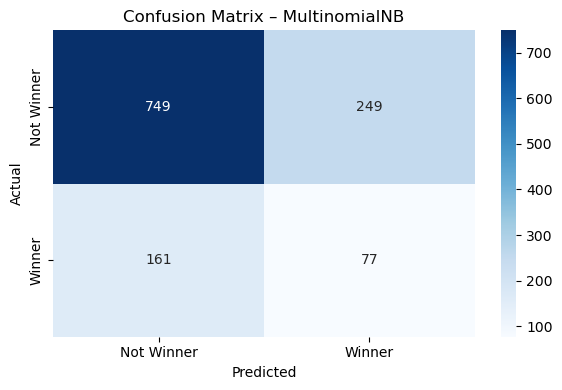

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_mnb = confusion_matrix(y_test, y_pred_mnb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Winner", "Winner"],
            yticklabels=["Not Winner", "Winner"])
plt.title("Confusion Matrix – MultinomialNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Bernoulli Naïve Bayes

In [58]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer

binarizer = Binarizer()
X_train_bin = binarizer.fit_transform(X_train)
X_test_bin = binarizer.transform(X_test)

bnb = BernoulliNB()
bnb.fit(X_train_bin, y_train)
y_pred_bnb = bnb.predict(X_test_bin)

print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))

BernoulliNB Accuracy: 0.8074433656957929
              precision    recall  f1-score   support

       False       0.81      1.00      0.89       998
        True       0.00      0.00      0.00       238

    accuracy                           0.81      1236
   macro avg       0.40      0.50      0.45      1236
weighted avg       0.65      0.81      0.72      1236



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Confusion Matrix for BernoulliNB**

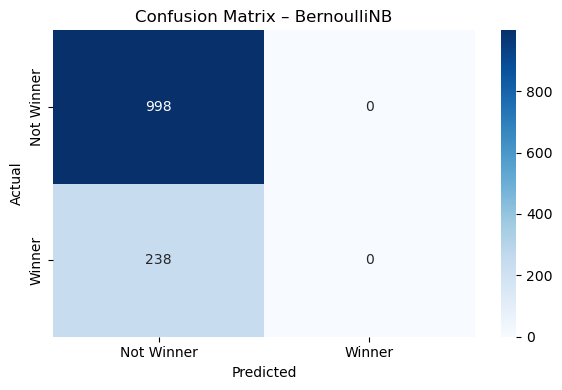

In [59]:
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Winner", "Winner"],
            yticklabels=["Not Winner", "Winner"])
plt.title("Confusion Matrix – BernoulliNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Categorical Naïve Bayes

In [60]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()

cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)

print("CategoricalNB Accuracy:", accuracy_score(y_test, y_pred_cnb))
print(confusion_matrix(y_test, y_pred_cnb))
print(classification_report(y_test, y_pred_cnb))

CategoricalNB Accuracy: 0.7969255663430421
[[967  31]
 [220  18]]
              precision    recall  f1-score   support

       False       0.81      0.97      0.89       998
        True       0.37      0.08      0.13       238

    accuracy                           0.80      1236
   macro avg       0.59      0.52      0.51      1236
weighted avg       0.73      0.80      0.74      1236



**Confusion Matrix for CategoricalNB**

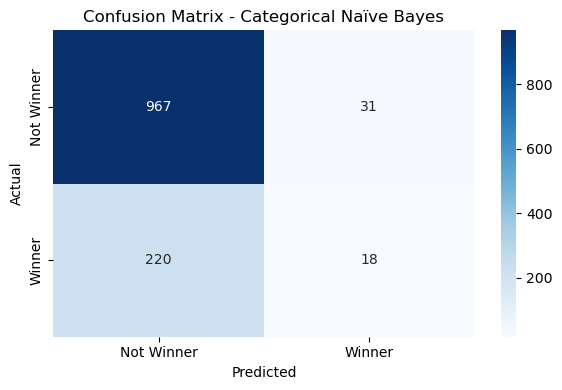

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_cnb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Winner", "Winner"],
            yticklabels=["Not Winner", "Winner"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Categorical Naïve Bayes")
plt.tight_layout()
plt.show()

In [62]:
results = {
    "Model": ["MultinomialNB", "BernoulliNB", "CategoricalNB"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_mnb),
        accuracy_score(y_test, y_pred_bnb),
        accuracy_score(y_test, y_pred_cnb)
    ]
}

pd.DataFrame(results)

,Model,Accuracy
0,MultinomialNB,0.668285
1,BernoulliNB,0.807443
2,CategoricalNB,0.796926
